In [3]:
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(
    'iris.csv', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


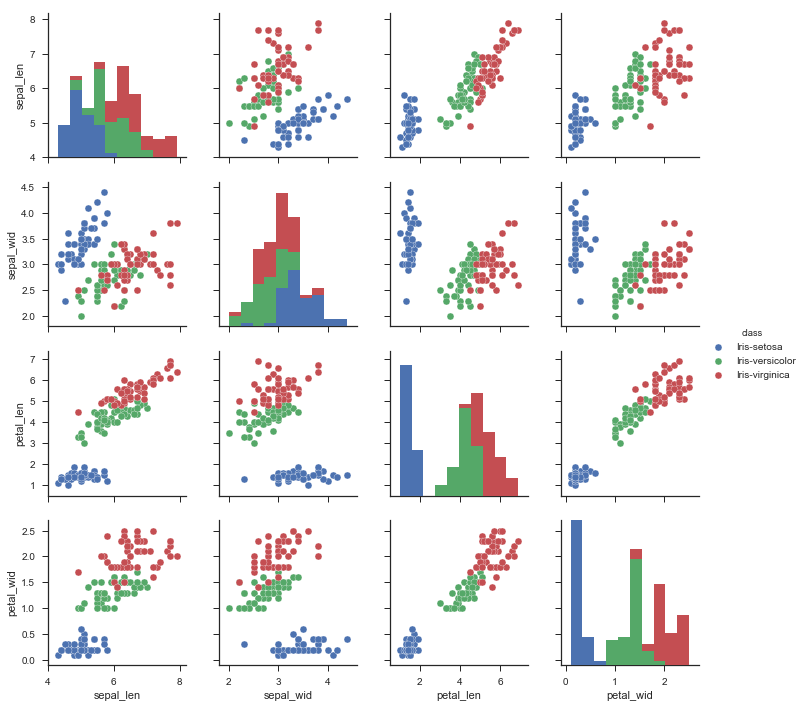

In [4]:
sns.set(style="ticks")

# df = sns.load_dataset("iris")
sns.pairplot(df, hue="class")

# Standardizing the dataset

In [5]:
X = df.iloc[:,:4]
# X.shape
y = df.iloc[:,4]
# y


# Standardizing

In [6]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
# X_std

# Computing Eigenvalues and eigen vectors

## Finding the Covariance Matrix

In [7]:
cov_mat = np.cov(X_std.T)
cov_mat

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Finding eigen values and eigen vectors

In [8]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


# Selecting Principal Component
The typical goal of a PCA is to reduce the dimensionality of the original feature space by projecting it onto a smaller subspace, where the eigenvectors will form the axes. 
In order to decide which eigenvector(s) can dropped without losing too much information for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the distribution of the data; those are the ones can be dropped.



In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


In [10]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [11]:
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

In [12]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

In [13]:
matrix_w

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

# Projection Onto the New Feature Space

In [14]:
Y = X_std.dot(matrix_w)
Y


array([[ -2.26454173e+00,  -5.05703903e-01],
       [ -2.08642550e+00,   6.55404729e-01],
       [ -2.36795045e+00,   3.18477311e-01],
       [ -2.30419716e+00,   5.75367713e-01],
       [ -2.38877749e+00,  -6.74767397e-01],
       [ -2.07053681e+00,  -1.51854856e+00],
       [ -2.44571134e+00,  -7.45626750e-02],
       [ -2.23384186e+00,  -2.47613932e-01],
       [ -2.34195768e+00,   1.09514636e+00],
       [ -2.18867576e+00,   4.48629048e-01],
       [ -2.16348656e+00,  -1.07059558e+00],
       [ -2.32737775e+00,  -1.58587455e-01],
       [ -2.22408272e+00,   7.09118158e-01],
       [ -2.63971626e+00,   9.38281982e-01],
       [ -2.19229151e+00,  -1.88997851e+00],
       [ -2.25146521e+00,  -2.72237108e+00],
       [ -2.20275048e+00,  -1.51375028e+00],
       [ -2.19017916e+00,  -5.14304308e-01],
       [ -1.89407429e+00,  -1.43111071e+00],
       [ -2.33994907e+00,  -1.15803343e+00],
       [ -1.91455639e+00,  -4.30465163e-01],
       [ -2.20464540e+00,  -9.52457317e-01],
       [ -

In [15]:
new_dataset = {
    'PC1': Y[:,0],
         'PC2': Y[:,1],
         'class': y
}
new_dataframe = pd.DataFrame.from_dict(new_dataset)

In [16]:
new_dataframe.head()

,PC1,PC2,class
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa
